In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

In [3]:
import pandas as pd

In [7]:
path="/content/drive/MyDrive/Dataset/parkinsonpath"

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



In [8]:
extension =".png"
list_of_img=[]
for root, _, files in os.walk(path):
    for file in files:
        if file.endswith(extension):
            list_of_img.append(os.path.join(root, file))

In [9]:
len(list_of_img)

204

In [11]:
spiral_h,wave_p,spiral_p,wave_h=[],[],[],[]
for path in list_of_img:
  if path.split("/")[-4]=="spiral":
    if path.split("/")[-2]== "parkinson":
      spiral_p.append(path)
    else:
      spiral_h.append(path)
  else:
    if path.split("/")[-2]== "parkinson":
      wave_p.append(path)
    else:
      wave_h.append(path)


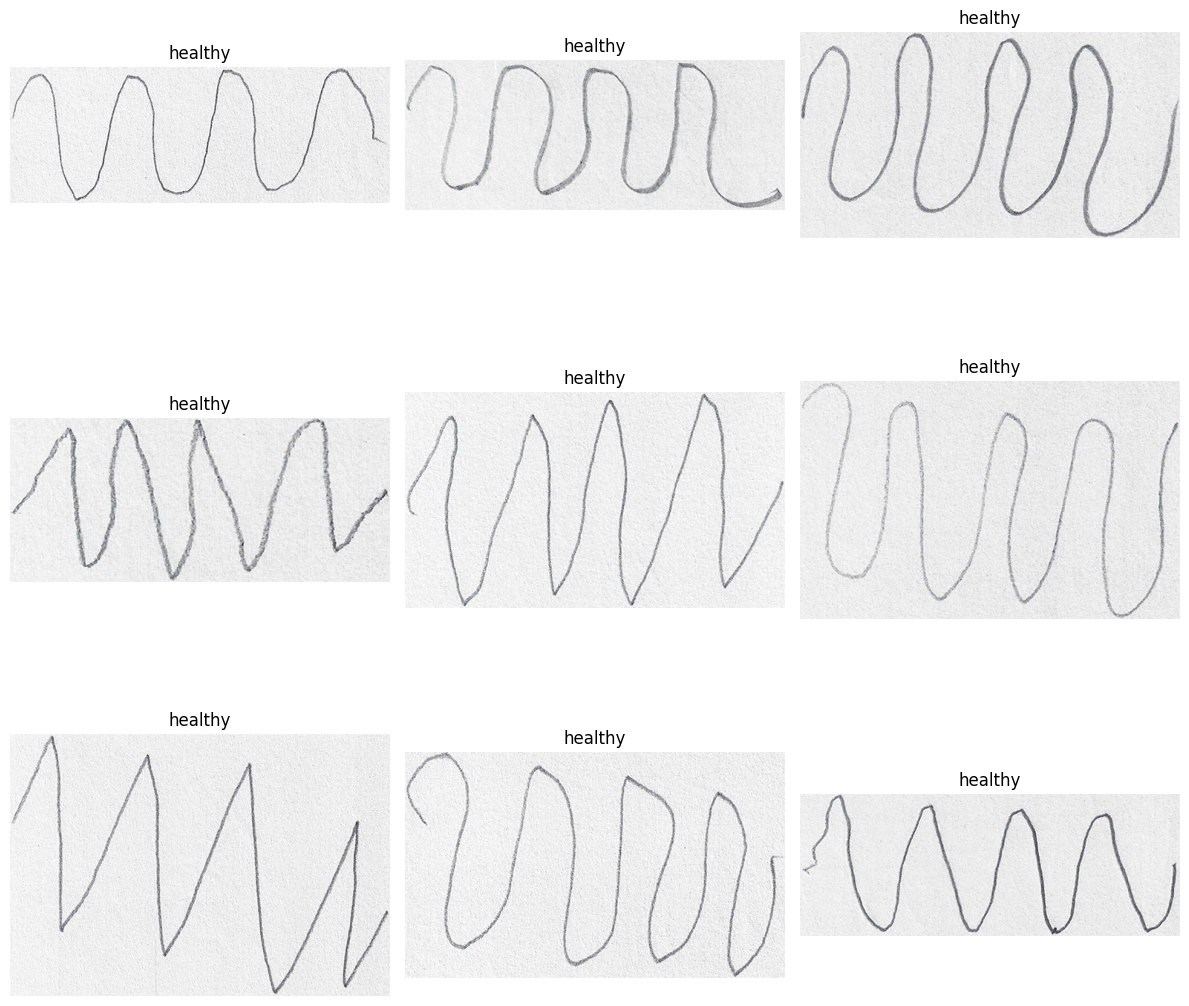

In [12]:
plt.figure(figsize=(12,12))

for i in range (1,10,1):
  plt.subplot(3,3,i)
  plt.imshow(plt.imread(wave_h[i]))
  plt.title(wave_h[i].split("/")[-2])
  plt.axis("off")

plt.tight_layout()
plt.show()

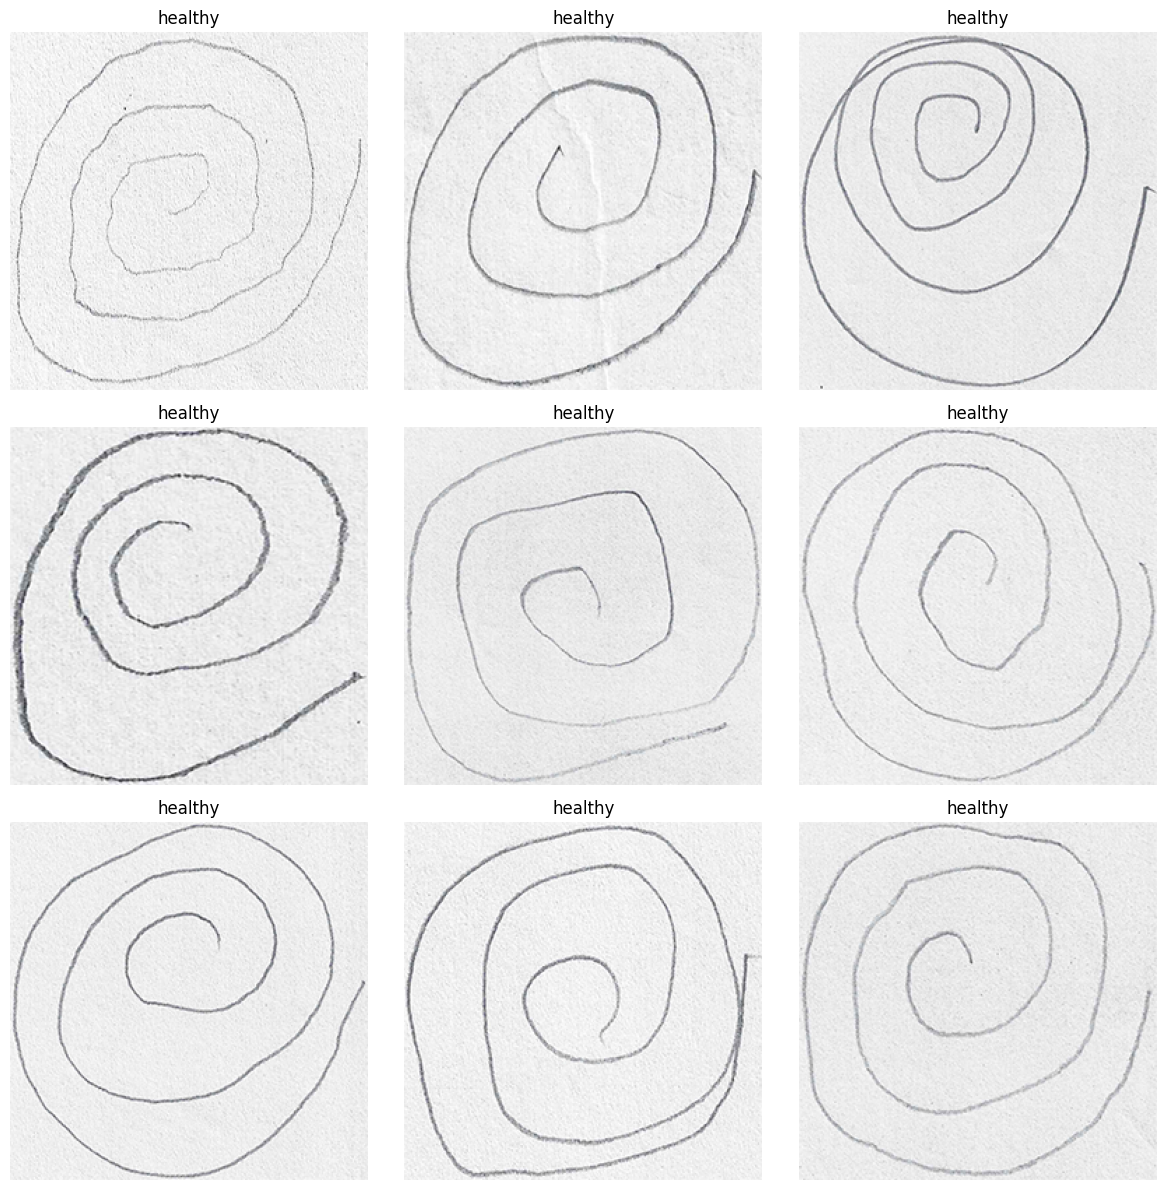

In [13]:
plt.figure(figsize=(12,12))

for i in range (1,10,1):
  plt.subplot(3,3,i)
  plt.imshow(plt.imread(spiral_h[i]))
  plt.title(spiral_h[i].split("/")[-2])
  plt.axis("off")

plt.tight_layout()
plt.show()

In [18]:
classifier=Sequential()
classifier.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(128,activation="relu"))
classifier.add(Dropout(0.2))
classifier.add(Dense(1,activation="sigmoid"))

In [19]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [21]:
spiral_train_generator=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Dataset/parkinsonpath/spiral/training",
    target_size=(128,128),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

spiral_test_generator=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Dataset/parkinsonpath/spiral/testing",
    target_size=(128,128),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [22]:
wave_train_generator=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Dataset/parkinsonpath/wave/training",
    target_size=(128,128),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

wave_test_generator=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Dataset/parkinsonpath/wave/testing",
    target_size=(128,128),
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [25]:
from functools import reduce
early_stopping=EarlyStopping(monitor="val_loss",patience=5,verbose=1,restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor="val_loss",factor=0.2,patience=3,verbose=1,min_lr=1e-6)
callbacks_list=[early_stopping,reduce_lr]

epochs=48

classifier.compile(loss="binary_crossentropy",optimizer =Adam(learning_rate=0.001)
,metrics=["accuracy"])

In [26]:
batch_size=32

In [28]:
history = classifier.fit(
    spiral_train_generator,
    steps_per_epoch=spiral_train_generator.n//spiral_train_generator.batch_size,
    epochs=epochs,
    validation_data=spiral_test_generator, # Pass the test generator directly
    callbacks=callbacks_list
)

Epoch 1/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.5594 - loss: 1.0260

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 10s/step - accuracy: 0.5479 - loss: 1.0593 - val_accuracy: 0.5000 - val_loss: 0.7514 - learning_rate: 0.0010
Epoch 2/48
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 0.4062 - loss: 0.7940

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step - accuracy: 0.4062 - loss: 0.7940 - val_accuracy: 0.5000 - val_loss: 0.8532 - learning_rate: 0.0010
Epoch 3/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5208 - loss: 0.8960 - val_accuracy: 0.5000 - val_loss: 0.7657 - learning_rate: 0.0010
Epoch 4/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step - accuracy: 0.3750 - loss: 0.8987 - val_accuracy: 0.5000 - val_loss: 0.6942 - learning_rate: 0.0010
Epoch 5/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.5417 - loss: 0.6699 - val_accuracy: 0.5000 - val_loss: 0.6972 - learning_rate: 0.0010
Epoch 6/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 499ms/step - accuracy: 0.6250 - loss: 0.6425 - val_accuracy: 0.5000 - val_loss: 0.7036 - learning_rate: 0.0010
Epoch 7/48
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 955ms/step - accuracy: 0.6500 - loss: 0.6752
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6167 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 

<function matplotlib.pyplot.show(close=None, block=None)>

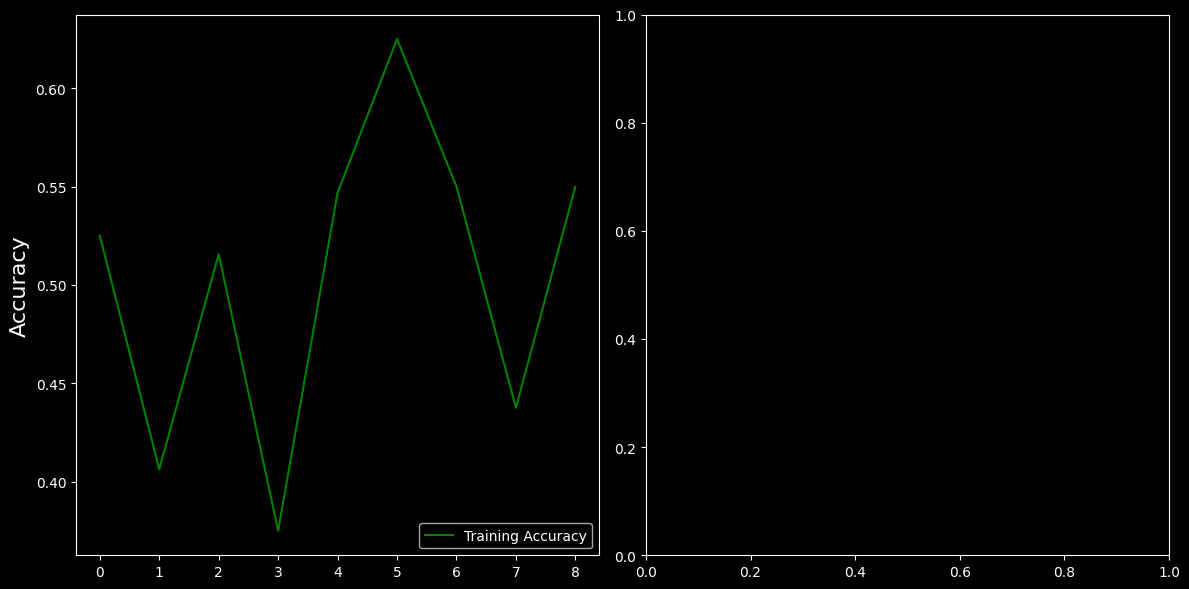

In [32]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
fig, axes = plt.subplots(1,2,figsize=(12,6))

axes[0].set_ylabel("Accuracy",fontsize=16)
axes[0].plot(history.history["accuracy"],label="Training Accuracy",color='green')
axes[0].legend(loc ='lower right')

plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

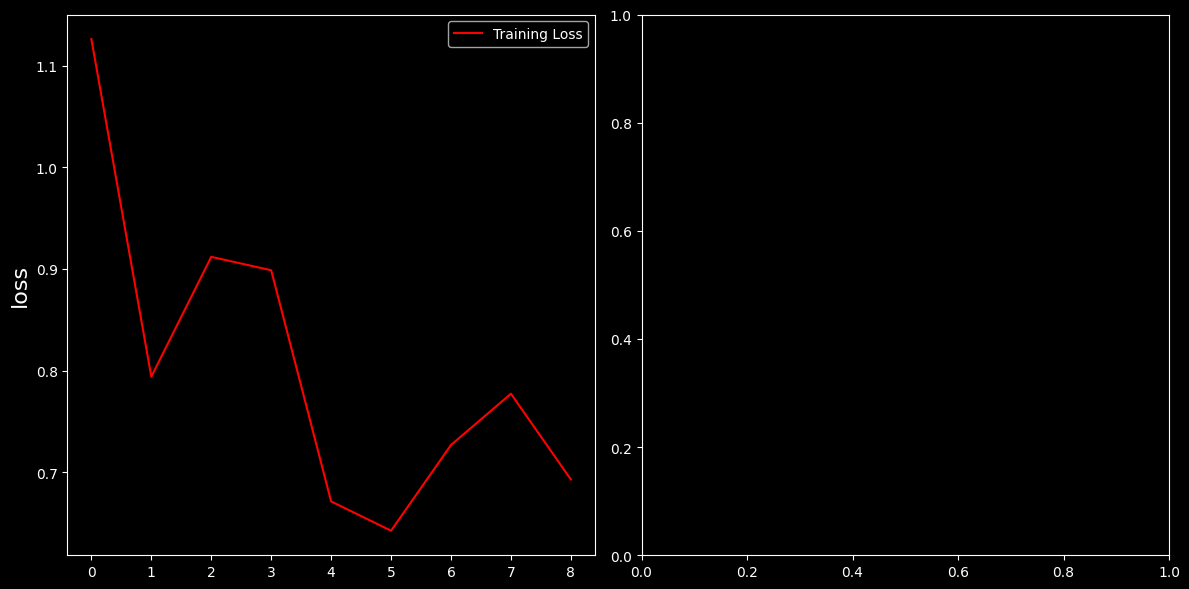

In [34]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
fig, axes = plt.subplots(1,2,figsize=(12,6))
axes[0].set_ylabel("loss",fontsize=16)
axes[0].plot(history.history["loss"],label="Training Loss",color='red')
axes[0].legend(loc ='upper right')

plt.tight_layout()
plt.show